In [3]:
import pickle
import sys
import numpy as np
import pandas as pd
import artm
import seaborn as sns
import matplotlib.pyplot as plt
print artm.version()

from os import path, mkdir
from datetime import datetime
sys.path.insert(0, '..\\modules\\helpers')

import distances_helper as dh 
import print_helper as ph
import create_model_helper as cmh

from plot_helper import PlotMaker
from config_helper import ConfigPaths

0.8.1


In [4]:
config = ConfigPaths('config.cfg')
plot_maker = PlotMaker()
print config.models_file_name

Q:\\topic_modeling\\csi_science_collections.git\experiments\UCI_filtered_ngramm_trimmed_without_names\np_05_03_complex\models.txt


In [5]:
models_file = open(config.models_file_name, 'a')

In [13]:
def save_pickle_file(dists, filename):
    pickle_filename = path.join(config.experiment_path, filename)
    pickle_file = open(pickle_filename, 'wb')
    pickle.dump(dists, pickle_file)
    pickle_file.close()
def load_pickle_file(filename):
    pickle_filename = path.join(config.experiment_path, filename)
    pickle_file = open(pickle_filename, 'rb')
    p_file = pickle.load(pickle_file)
    pickle_file.close()
    return p_file
def save_model_pickle(_model_name, _model, _save=True):
    phi = _model.get_phi()
    phi = phi[(phi.T != 0).any()]
    theta = _model.get_theta()    
    saved_top_tokens = _model.score_tracker['top_tokens_score'].last_tokens
    if _save:
        save_pickle_file(phi, 'phi_{}.p'.format(_model_name))
        save_pickle_file(theta, 'theta_{}.p'.format(_model_name))
        save_pickle_file(saved_top_tokens, 'saved_top_tokens_{}.p'.format(_model_name))
    return phi, theta, saved_top_tokens
def load_model_pickle(_model_name, _distance_name):
    phi = load_pickle_file('phi_{}.p'.format(_model_name))
    theta = load_pickle_file('theta_{}.p'.format(_model_name))
    saved_top_tokens = load_pickle_file('saved_top_tokens_{}.p'.format(_model_name))
    distances = load_pickle_file('{}.p'.format(_distance_name))
    return phi, theta, saved_top_tokens, distances
def plot_background_score(artm_model):
    %matplotlib inline
    tokens___0_5 = artm_model.score_tracker['background_tokens_ratio_score_0.5'].tokens
    tokens___0_25 = artm_model.score_tracker['background_tokens_ratio_score_0.25'].tokens
    tokens___0_75 = artm_model.score_tracker['background_tokens_ratio_score_0.75'].tokens
    tokens___2 = artm_model.score_tracker['background_tokens_ratio_score_2'].tokens
    tokens___5 = artm_model.score_tracker['background_tokens_ratio_score_5'].tokens
    print len(tokens___0_25[-1]), len(tokens___0_5[-1]), len(tokens___0_75[-1]), len(tokens___2[-1]), len(tokens___5[-1])

    value___0_5 = artm_model.score_tracker['background_tokens_ratio_score_0.5'].value
    value___0_25 = artm_model.score_tracker['background_tokens_ratio_score_0.25'].value
    value___0_75 = artm_model.score_tracker['background_tokens_ratio_score_0.75'].value
    value___2 = artm_model.score_tracker['background_tokens_ratio_score_2'].value
    value___5 = artm_model.score_tracker['background_tokens_ratio_score_5'].value
    iterations = range(0, len(tokens___0_25))
    plt.plot(iterations, value___0_25, 'ro-')
    plt.plot(iterations, value___0_5, 'bo-')
    plt.plot(iterations, value___0_75, 'go-')
    plt.plot(iterations, value___2, 'mo-')
    plt.plot(iterations, value___5, 'yo-')
    return tokens___0_25, tokens___0_5, tokens___0_75, tokens___2, tokens___5

In [7]:
batch_vectorizer = artm.BatchVectorizer(data_path=config.output_batches_path,
                                        data_format='batches')
dictionary = artm.Dictionary()
dictionary.load(dictionary_path=config.dictionary_path + '.dict')

## Model 1, no common topics, no regs

name = model_no_reg, n_topics = 102, n_doc_passes = 5, seed_value = 100, n_iterations = 20, top_tokens_score_common = 15, top_tokens_score_subject = 15, topic_kernel_score_common = 0.25, topic_kernel_score_subject = 0.25

15017 13116 11333 5820 1823


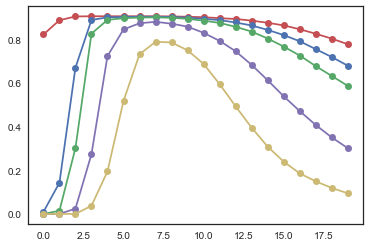

In [11]:
n_topics = 102
common_topics = []
subject_topics = list(set([u'topic_{}'.format(idx) for idx in range(len(common_topics), n_topics)]) - set(common_topics))
tmp_model = cmh.create_model_complex(current_dictionary=dictionary, n_topics=n_topics, n_doc_passes=5, 
                                     seed_value=100, n_top_tokens=15, p_mass_threshold=0.25, 
                                     common_topics=common_topics, subject_topics=subject_topics,
                                     class_name='ngramm')
tmp_model = cmh.fit_one_model_complex(plot_maker, batch_vectorizer, models_file, config, 
                                      tmp_model, _n_iterations=20,             
                                      _model_name='model_no_reg')
tokens___0_25, tokens___0_5, tokens___0_75, tokens___2, tokens___5 = plot_background_score(tmp_model)

In [17]:
for w in tokens___5[-1][0:100]:
    print w

математика
красота
книга
лекция
фонд
интервью
дмитрия
полка
замысел
америка
журнал
отдел
доклад
студент
школьник
сюжет
новый_форма
олимпиада
лагерь
кружка
математик
регион
запад
школа
германия
франция
прошлое
курс
аналог
деревня
конференция
программа
шутка
надпись
камень
участник
небольшой_группа
зона
творчество
библиотека
дата
издание
смелость
товар
издательство
общество
автор_книга
поддержка
перевод
редактор
соавтор
художник
иванов
иллюстрация
отбор
угол
цветок
ньютон
литература
запись
отрезка
плоскость
скорость
колесо
след
пара
тело
равновесие
вуз
поэзия
музыка
вкус
еда
доказательство
буква
литр
правый
строка
население
карта
античность
уничтожение
корабль
ося
солнце
инженер
воздух
атмосфера
поверхность
предположение
земля
траектория
заключение
искусство
конструкция
естественный_наука
впечатление
физика
рост
мёртвый


## Model 12, no common topics, some regs

name = model_reg_12, n_topics = 102, n_doc_passes = 5, seed_value = 100, n_iterations = 30, top_tokens_score_common = 15, top_tokens_score_subject = 15, topic_kernel_score_common = 0.25, topic_kernel_score_subject = 0.25
decorrelator_phi_regularizer_subject, tau = 10
ss_theta_regularizer_subject, tau = -0.5
ss_phi_regularizer_subject, tau = -2

0 0 0 0 0


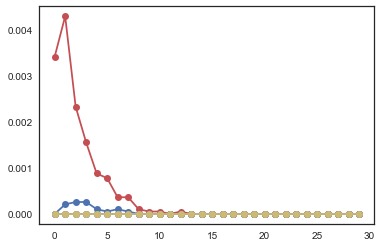

In [20]:
n_topics = 102
common_topics = []
subject_topics = list(set([u'topic_{}'.format(idx) for idx in range(len(common_topics), n_topics)]) - set(common_topics))
tmp_model = cmh.create_model_complex(current_dictionary=dictionary, n_topics=n_topics, n_doc_passes=5, 
                                     seed_value=100, n_top_tokens=15, p_mass_threshold=0.25, 
                                     common_topics=common_topics, subject_topics=subject_topics,
                                     class_name='ngramm')
# subject topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_subject', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_subject'].tau = -0.5
tmp_model.regularizers['ss_phi_regularizer_subject'].tau = -2
tmp_model.regularizers['decorrelator_phi_regularizer_subject'].tau = 10

tmp_model = cmh.fit_one_model_complex(plot_maker, batch_vectorizer, models_file, config, 
                                  tmp_model, _n_iterations=30,             
                                  _model_name='model_reg_12')

tokens___0_25, tokens___0_5, tokens___0_75, tokens___2, tokens___5 = plot_background_score(tmp_model)

Опа, фоновых слов нет(

## Model complex_reg_1, 2 common topics, some regs

name = model_complex_reg_1, n_topics = 102, n_doc_passes = 5, seed_value = 100, n_iterations = 30, top_tokens_score_common = 15, top_tokens_score_subject = 15, topic_kernel_score_common = 0.25, topic_kernel_score_subject = 0.25
decorrelator_phi_regularizer_subject, tau = 10
ss_theta_regularizer_common, tau = 0.5
ss_theta_regularizer_subject, tau = -0.5
ss_phi_regularizer_subject, tau = -2
ss_phi_regularizer_common, tau = 0.5

3363 3107 2898 2043 453


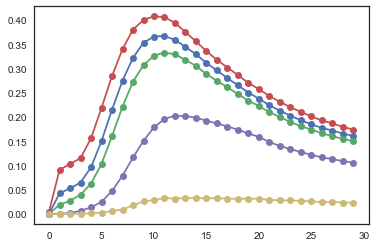

In [21]:
n_topics = 102
common_topics = [u'topic_0', u'topic_1']
subject_topics = list(set([u'topic_{}'.format(idx) for idx in range(len(common_topics), n_topics)]) - set(common_topics))
tmp_model = cmh.create_model_complex(current_dictionary=dictionary, n_topics=n_topics, n_doc_passes=5, 
                                     seed_value=100, n_top_tokens=15, p_mass_threshold=0.25, 
                                     common_topics=common_topics, subject_topics=subject_topics,
                                     class_name='ngramm')
# subject topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_subject', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_subject'].tau = -0.5
tmp_model.regularizers['ss_phi_regularizer_subject'].tau = -2
tmp_model.regularizers['decorrelator_phi_regularizer_subject'].tau = 10

# # common topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_common', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_common', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_common'].tau = 0.5
tmp_model.regularizers['ss_phi_regularizer_common'].tau = 0.5

tmp_model = cmh.fit_one_model_complex(plot_maker, batch_vectorizer, models_file, config, 
                                      tmp_model, _n_iterations=30,             
                                      _model_name='model_complex_reg_1')

tokens___0_25, tokens___0_5, tokens___0_75, tokens___2, tokens___5 = plot_background_score(tmp_model)

In [22]:
for w in tokens___5[-1][0:100]:
    print w

автор
математика
книга
журнал
студент
математик
регион
запад
организация
школа
франция
прошлое
курс
страна
надпись
участник
проект
институт
художник
отбор
тема
литература
запись
плоскость
модель
след
тело
музыка
понятие
население
луч_свет
солнце
движение
атмосфера
частица
поверхность
земля
трёхмерный_пространство
состояние
рост
наука
язык
социолог
исследование
источник
материал
болезнь
женщина
теория
жертва
угроза
стоимость
показатель
мать
роль
ориентация
долг
военный
функция
борьба
объект
фигура
философ
действие
классик
республика
поведение
тирания
либерализм
признак
либерал
произведение
партнёр
эмоция
симптом
пища
рыба
синтез
разный_вид
учёный
гренландия
цивилизация
глобализация
эффект
врач
птица
агент
рынок
медицина
сумма
орбита
вес
строительство
группа
история
национализм
монарх
народ
концепция
канал


Очень странные common words, перплексия большая (2000), тета для subject недостаточно разрежена, kernel size маленький (14).

## model 2

In [24]:
n_topics = 102
common_topics = [u'topic_0', u'topic_1']
subject_topics = list(set([u'topic_{}'.format(idx) for idx in range(len(common_topics), n_topics)]) - set(common_topics))
tmp_model = cmh.create_model_complex(current_dictionary=dictionary, n_topics=n_topics, n_doc_passes=5, 
                                     seed_value=100, n_top_tokens=15, p_mass_threshold=0.25, 
                                     common_topics=common_topics, subject_topics=subject_topics,
                                     class_name='ngramm')
# subject topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_subject', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_subject'].tau = -1
tmp_model.regularizers['ss_phi_regularizer_subject'].tau = -2
tmp_model.regularizers['decorrelator_phi_regularizer_subject'].tau = 5

# # common topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_common', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_common', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_common'].tau = 0.5
tmp_model.regularizers['ss_phi_regularizer_common'].tau = 0.5

tmp_model = cmh.fit_one_model_complex(plot_maker, batch_vectorizer, models_file, config, 
                                  tmp_model, _n_iterations=30,             
                                  _model_name='model_20_complex_reg_2')

tokens___0_25, tokens___0_5, tokens___0_75, tokens___2, tokens___5 = plot_background_score(tmp_model)

KeyboardInterrupt: 

In [29]:
for w in tokens___0_75[-1][0:100]:
    print w

автор
кейс
математика
книга
задача
экзамен
фонд
культура
журнал
студент
школьник
сюжет
традиция
математик
регион
запад
организация
школа
германия
франция
курс
страна
дубна
конференция
программа
надпись
участник
проект
жильё
питание
творчество
библиотека
издание
издатель
товар
общество
перевод
редактирование
художник
дизайнер
дуга
градус
ньютон
литература
длина
плоскость
модель
направление
нерешенный_задача
тело
шар
вуз
поэзия
музыка
хороший_вкус
понятие
теорема
слово
буква
население
миллион
корабль
пучок
луч_свет
солнце
флот
движение
атмосфера
частица
поверхность
земля
трёхмерный_пространство
траектория
прогноз_погода
искусство
практический_приложение
естественный_наука
физика
наука
журналист
интересный_проект
статья
читатель
трасса
язык
российский_контекст
социология
социолог
европейский_университет
петербург
феминизм
анализ
дискурс
концепт
публицистика
биография
текст
материал
общий_тенденция
мужчина


Тета лучше стала, но всё равно высокая перплексия. Изменим common коэф.

## model 3

name = model_20_complex_reg_3, n_topics = 102, n_doc_passes = 5, seed_value = 100, n_iterations = 35, top_tokens_score_common = 15, top_tokens_score_subject = 15, topic_kernel_score_common = 0.25, topic_kernel_score_subject = 0.25
decorrelator_phi_regularizer_subject, tau = 5
ss_theta_regularizer_common, tau = 0.2
ss_theta_regularizer_subject, tau = -1
ss_phi_regularizer_subject, tau = -2
ss_phi_regularizer_common, tau = 0.2

3718 3127 2776 1933 848


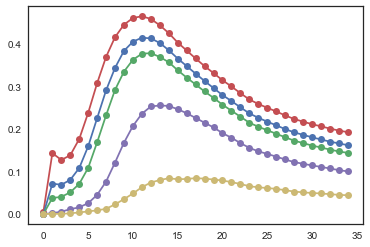

In [25]:
n_topics = 102
common_topics = [u'topic_0', u'topic_1']
subject_topics = list(set([u'topic_{}'.format(idx) for idx in range(len(common_topics), n_topics)]) - set(common_topics))
tmp_model = cmh.create_model_complex(current_dictionary=dictionary, n_topics=n_topics, n_doc_passes=5, 
                                     seed_value=100, n_top_tokens=15, p_mass_threshold=0.25, 
                                     common_topics=common_topics, subject_topics=subject_topics,
                                     class_name='ngramm')
# subject topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_subject', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_subject'].tau = -1
tmp_model.regularizers['ss_phi_regularizer_subject'].tau = -2
tmp_model.regularizers['decorrelator_phi_regularizer_subject'].tau = 5

# # common topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_common', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_common', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_common'].tau = 0.2
tmp_model.regularizers['ss_phi_regularizer_common'].tau = 0.2

tmp_model = cmh.fit_one_model_complex(plot_maker, batch_vectorizer, models_file, config, 
                                  tmp_model, _n_iterations=35,             
                                  _model_name='model_20_complex_reg_3')

tokens___0_25, tokens___0_5, tokens___0_75, tokens___2, tokens___5 = plot_background_score(tmp_model)

In [26]:
for w in tokens___5[-1][0:100]:
    print w

экзамен
питание
издание
товар
длина
вуз
хороший_вкус
теорема
интересный_проект
социология
мужчина
репрессия
развод
муж
референция
деятель_искусство
государство
подчинение
эгалитаризм
крепость
власть
дворянин
классик
ритуал
поединок
суждение
поступок
дихотомия
ремарка
эмоция
социальный_иерархия
матерь
конфликт
интеллект
свобода
новый_гвинея
насекомое
особь
препарат
профилактика
гренландия
популяция
заболевание
эмоциональный_стресс
психический_здоровье
кондиционер
очистка
белок
общественный_жизнь
монарх
монархия
ход_лекция
привычный_формат
бразилия
частота
размер_тело
антропология
антрополог
российский_квантовый_центр
историк
знаменитый_писатель
сократ
платон
аристотель
уравнение
нельсон
кун
экспансия
словесность
гуманитарный_дисциплина
лингвистика
предание
гуманитарий
лингвист
физик
тоталитарный_государство
интерференция
исторический_наука
добросовестность
оппозиция
этнология
комментатор
палеонтолог
экономист
праздник
преподавание
партия
система_образование
заявка
стигматизация
химия
уг

Похожа на 2, только для common коэф. другие. А теперь наоборот сделаем дикие коэф. для common 

## model 4

name = model_20_complex_reg_4, n_topics = 102, n_doc_passes = 5, seed_value = 100, n_iterations = 35, top_tokens_score_common = 15, top_tokens_score_subject = 15, topic_kernel_score_common = 0.25, topic_kernel_score_subject = 0.25
decorrelator_phi_regularizer_subject, tau = 5
ss_theta_regularizer_common, tau = 2
ss_theta_regularizer_subject, tau = -1
ss_phi_regularizer_subject, tau = -2
ss_phi_regularizer_common, tau = 2

10690 8225 6631 3353 1502


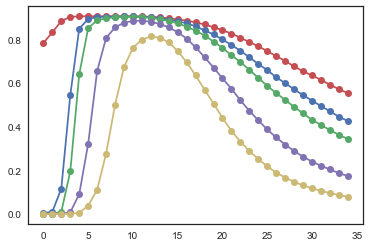

In [27]:
n_topics = 102
common_topics = [u'topic_0', u'topic_1']
subject_topics = list(set([u'topic_{}'.format(idx) for idx in range(len(common_topics), n_topics)]) - set(common_topics))
tmp_model = cmh.create_model_complex(current_dictionary=dictionary, n_topics=n_topics, n_doc_passes=5, 
                                     seed_value=100, n_top_tokens=15, p_mass_threshold=0.25, 
                                     common_topics=common_topics, subject_topics=subject_topics,
                                     class_name='ngramm')
# subject topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_subject', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_subject'].tau = -1
tmp_model.regularizers['ss_phi_regularizer_subject'].tau = -2
tmp_model.regularizers['decorrelator_phi_regularizer_subject'].tau = 5

# # common topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_common', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_common', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_common'].tau = 2
tmp_model.regularizers['ss_phi_regularizer_common'].tau = 2

tmp_model = cmh.fit_one_model_complex(plot_maker, batch_vectorizer, models_file, config, 
                                  tmp_model, _n_iterations=35,             
                                  _model_name='model_20_complex_reg_4')

tokens___0_25, tokens___0_5, tokens___0_75, tokens___2, tokens___5 = plot_background_score(tmp_model)

In [28]:
for w in tokens___5[-1][0:100]:
    print w

автор
математика
образование
красота
книга
дорога
задача
лекция
фонд
культура
интервью
дмитрия
америка
журнал
отдел
сша
доклад
студент
сюжет
новый_форма
лагерь
обиход
традиция
математик
регион
запад
школа
германия
франция
прошлое
курс
страна
аналог
деревня
конференция
программа
шутка
камень
участник
небольшой_группа
проект
институт
зона
дом
творчество
библиотека
дата
открытие
решение
издание
инициатива
общество
поддержка
перевод
редактор
соавтор
художник
иванов
иллюстрация
важный_часть
отбор
объяснение
угол
тема
литература
запись
глава
велосипед
отрезка
плоскость
скорость
модель
след
описание
пара
тело
равновесие
свойство
вкус
понятие
еда
точка
доказательство
слово
буква
литр
плата
правый
строка
список
население
миллион
карта
масштаб
античность
уничтожение
корабль
ося
солнце
инженер


## model 5

In [ ]:
n_topics = 102
common_topics = [u'topic_0', u'topic_1']
subject_topics = list(set([u'topic_{}'.format(idx) for idx in range(len(common_topics), n_topics)]) - set(common_topics))
tmp_model = cmh.create_model_complex(current_dictionary=dictionary, n_topics=n_topics, n_doc_passes=5, 
                                     seed_value=100, n_top_tokens=15, p_mass_threshold=0.25, 
                                     common_topics=common_topics, subject_topics=subject_topics,
                                     class_name='ngramm')
# subject topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_subject', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_regularizer_subject', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_subject'].tau = -1
tmp_model.regularizers['ss_phi_regularizer_subject'].tau = -2
tmp_model.regularizers['decorrelator_phi_regularizer_subject'].tau = 5

# # common topics
tmp_model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='ss_theta_regularizer_common', 
        topic_names=subject_topics))
tmp_model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='ss_phi_regularizer_common', 
        topic_names=subject_topics, class_ids=['ngramm']))
tmp_model.regularizers['ss_theta_regularizer_common'].tau = 0.5
tmp_model.regularizers['ss_phi_regularizer_common'].tau = 0.5

tmp_model = cmh.fit_one_model_complex(plot_maker, batch_vectorizer, models_file, config, 
                                  tmp_model, _n_iterations=35,             
                                  _model_name='model_20_complex_reg_5')

tokens___0_25, tokens___0_5, tokens___0_75, tokens___2, tokens___5 = plot_background_score(tmp_model)

In [ ]:
for w in tokens___5[-1][0:100]:
    print w

In [29]:
models_file.close()